# **Test of PRB Data Automation**

### **Part 1: Data Collection and Cleaning**
Import all dependencies that we will need.

In [102]:
import pandas as pd
import numpy as np
import requests # library to handle requests

from sklearn.cluster import KMeans  # import k-means from clustering stage

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt

# use the inline backend to generate the plots within the browser
%matplotlib inline  

print('Libraries imported.')

Libraries imported.


### Part 1.1: Get File Names and Submission Dates from ECaRT

In [103]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-6ea716cc-2d09-4e82-9255-a0eae87f3bd6',
    'IBM_API_KEY_ID': 'TENmOM4YrGnuoGazHula5gI6JUeiuk1gmGhohtSRvyph',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'mydatascienceproject-donotdelete-pr-asv446u0bbiq8n',
    'FILE': 'ECart Test Data.csv'
}
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_32a2e9c30c1e48ed8c0d7b066d1cda51 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='TENmOM4YrGnuoGazHula5gI6JUeiuk1gmGhohtSRvyph',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_32a2e9c30c1e48ed8c0d7b066d1cda51.get_object(Bucket='mydatascienceproject-donotdelete-pr-asv446u0bbiq8n',Key='ECart Test Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

EC_Data = pd.read_csv(body)
EC_Data.head()



,ObjectID,Name,Created,TaskOrder,C00X,DueDate,OnTime,Vote,DidCOTRVote,Pass-Fail,DocCategory
0,6624914,C001-18F1500-0404_PROPRIETARY_IPMR_(Aug2018),12/10/2018,1500,C001,10/24/2018,No,Automatic Approval,No,Fail,IPMR
1,6724375,C001-18F1500-0483_PROPRIETARY_IPMR_(Sept2018),12/24/2018,1500,C001,11/21/2018,No,Automatic Approval,No,Fail,IPMR
2,6753097,C001-18F1500-0549_PROPRIETARY_IPMR_(Oct2018),1/7/2019,1500,C001,12/11/2018,No,Vote - Approved,Yes,Fail,IPMR
3,6865778,C001-18F1500-0578-PROPRIETARY_IPMR_(Nov2018),1/23/2019,1500,C001,1/16/2019,No,Automatic Approval,No,Fail,IPMR
4,6883257,C001-18F1500-0655_PROPRIETARY_IPMR_(Dec2018),1/28/2019,1500,C001,2/12/2019,Yes,Vote - Approved,Yes,Pass,IPMR


#### Part 1.2: Examine Submittals by Task Order

In [104]:
s = EC_Data.groupby('TaskOrder')['ObjectID'].nunique()

df1 = pd.DataFrame(data=s.index, columns=['TaskOrder'])
df2 = pd.DataFrame(data=s.values, columns=['# of CDRLs'])
df = pd.merge(df1, df2, left_index=True, right_index=True)

new_cols = ['Task Order', '# of CDRLs']
df.columns = new_cols

blankIndex=[''] * len(df)
df.index=blankIndex
df.index

df

,Task Order,# of CDRLs
,1500,14
,3100,16
,4100,12
,5500,16
,5900,14
,6100,20
,7300,15
,8002,36
,8003,40
,8004,27


#### Part 1.3: Examine Submittals by CDRL Number (C00x)

In [105]:
t = EC_Data.groupby('C00X')['ObjectID'].nunique()

df3 = pd.DataFrame(data=t.index, columns=['C00X'])
df4 = pd.DataFrame(data=t.values, columns=['#'])
df5 = pd.merge(df3, df4, left_index=True, right_index=True)

new_cols1 = ['CDRL #', 'Total']
df5.columns = new_cols1

blankIndex=[''] * len(df5)
df5.index=blankIndex
df5.index

df5

,CDRL #,Total
,C001,88
,C002,42
,C003,49
,C004,9
,C005,24
,C006,28
,C007,17
,C008,12
,C009,7
,C010,12


#### Part 1.4: Visualize CDRL Submittals by Category

In [106]:
r = EC_Data.groupby('DocCategory')['ObjectID'].nunique()

df6 = pd.DataFrame(data=r.index, columns=['DocCategory'])
df7 = pd.DataFrame(data=r.values, columns=['#'])
df8 = pd.merge(df6, df7, left_index=True, right_index=True)

new_cols2 = ['Category', 'Total']
df8.columns = new_cols2

blankIndex=[''] * len(df8)
df8.index=blankIndex
df8.index

df8

,Category,Total
,IPMR,88
,Other,180
,TOSR,90


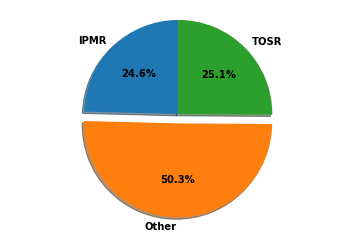

In [107]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'IPMR', 'Other', 'TOSR'
sizes = [24.6, 50.3, 25.1]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Other')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Part 1.5: Visualize Passes vs. Failures for Period 3

In [108]:
v = EC_Data.groupby('Pass-Fail')['ObjectID'].nunique()

df9 = pd.DataFrame(data=v.index, columns=['Pass-Fail'])
df10 = pd.DataFrame(data=v.values, columns=['#'])
df11 = pd.merge(df9, df10, left_index=True, right_index=True)

new_cols3 = ['Pass / Fail', 'Total']
df11.columns = new_cols3

blankIndex=[''] * len(df11)
df11.index=blankIndex
df11.index

df11

,Pass / Fail,Total
,Fail,49
,Pass,309


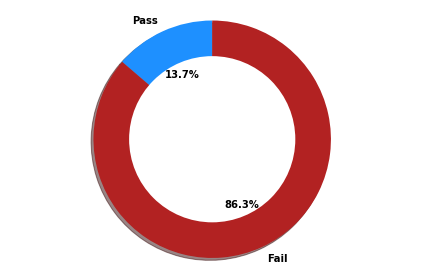

In [109]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels2 = 'Pass', 'Fail'
sizes2 = [13.7, 86.3]
#colors
colors = ['#1E90FF','#B22222']

fig2, ax2 = plt.subplots()
ax2.pie(sizes2, labels=labels2, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)



#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig2 = plt.gcf()
fig2.gca().add_artist(centre_circle)

ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()



##### Pass / Fails by Task Order

In [110]:
h = EC_Data.groupby(['TaskOrder', 'Pass-Fail']).count()
h = h[['ObjectID']]
h.columns = ['#']
h

#
TaskOrder Pass-Fail    
1500      Fail        6
          Pass        8
3100      Pass       16
4100      Fail        3
          Pass        9
5500      Fail        6
          Pass       10
5900      Fail        1
          Pass       13
6100      Pass       20
7300      Pass       15
8002      Fail       12
          Pass       24
8003      Fail        5
          Pass       35
8004      Fail        6
          Pass       21
8600      Fail        6
          Pass       21
8700      Fail        3
          Pass        8
8900      Fail        1
          Pass       18
9400      Pass       32
9700      Pass       59

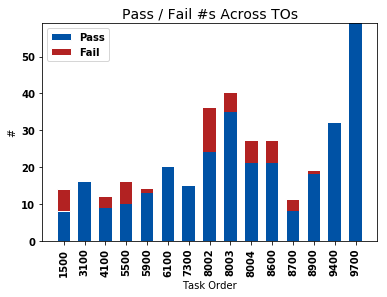

In [111]:
from matplotlib import rc
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
Pass = [8, 16, 9, 10, 13, 20, 15, 24, 35, 21, 21, 8, 18, 32, 59]
Fail = [6, 0, 3, 6, 1, 0, 0, 12, 5, 6, 6, 3, 1, 0, 0]

 
# Heights of Pass + Fail bars
bars = np.add(Pass, Fail).tolist()
 
# The position of the bars on the x-axis
r = [0,1,2,3,4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
 
# Names of group and bar width
names = ['1500','3100','4100','5500','5900', '6100', '7300', '8002', '8003', '8004', '8600', '8700', '8900', '9400', '9700']
barWidth = 0.6

 
# Create blue bars
plt.bar(r, Pass, color='#0052A5', edgecolor='white', width=barWidth, label='Pass')
# Create red bars on top of the first ones
plt.bar(r, Fail, bottom=Pass, color='#B22222', edgecolor='white', width=barWidth, label='Fail')


 
# Custom X axis
plt.xticks(r, names, fontweight='bold', rotation='vertical')
plt.xlabel("Task Order")
plt.ylabel('#')
plt.title('Pass / Fail #s Across TOs',fontsize=14)
plt.legend(loc=2)



# Show graphic
plt.show()

In [99]:
!conda install -c conda-forge folium

# import the library
import folium
 
# Make an empty map
m = folium.Map(location=[20, 0], zoom_start=3.5)
 
# Mapbox Control Room
m = folium.Map(location=[48.85, 2.35], tiles="Mapbox Control Room", zoom_start=2)
m


Solving environment: done

# All requested packages already installed.



In [113]:
!pip install hide_code==0.5.1
! pip install wkhtmltopdf

Requirement not upgraded as not directly required: jupyter in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from hide_code==0.5.1)
Requirement not upgraded as not directly required: pdfkit in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from hide_code==0.5.1)
Requirement not upgraded as not directly required: nbconvert>=5.0 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from hide_code==0.5.1)
Requirement not upgraded as not directly required: notebook>=5.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from hide_code==0.5.1)
Requirement not upgraded as not directly required: ipykernel in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from jupyter->hide_code==0.5.1)
Requirement not upgraded as not directly required: ipywidgets in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from jupyter->hide_code==0.5.1)
Requirement not upgraded as not directly required: qtconsole in /opt/conda/envs/DSX-Python35/lib/python3.5/